In [ ]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

In [ ]:
import numpy as np #
import matplotlib
import tkinter

import pylab # модуль для построения графиков
import matplotlib.pyplot as plt #                                                              +
import cv2
import ipywidgets as widgets
from PIL import ImageEnhance
from PIL import Image # отрисовка изображений

from skimage import io, color
from skimage import util
import matplotlib.pyplot as plt
import math
from IPython.display import display

In [ ]:
import matplotlib.image as mpimg
from keras.preprocessing import image
import os
from tensorflow.keras.preprocessing import image
import pandas as pd
import shutil
from shutil import copyfile

In [ ]:
import ipywidgets as widgets
from IPython.display import display

In [ ]:
import pydicom
from pydicom.data import get_testdata_files

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#model = keras.models.load_model('model_sagittal.h5')

# Поэтапно

#### Исходное изображение

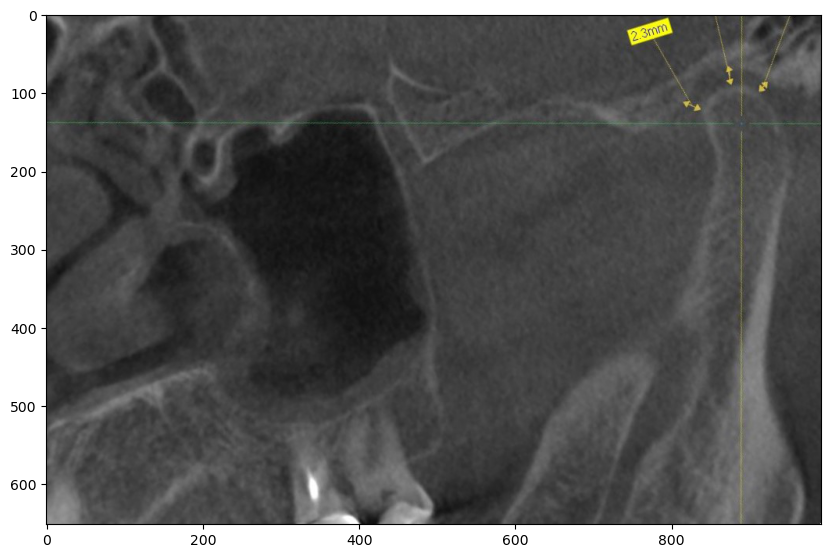

In [ ]:
image1 = Image.open('all/К101Пс.jpg') # Загрузка изображения
plt.figure(figsize=(10, 10))
plt.imshow(image1, cmap='gray') # ПОКАЗАТЬ что там
plt.show()

#### Изображение без желного

In [ ]:
image_array = np.array(image1) # Преобразование изображения в массив numpy
yellow_lower = (120,120, 0) # Определение границ для желтого цвета в формате RGB
yellow_upper = (255, 255,255)
yellow_mask = np.logical_and(np.all(image_array >= yellow_lower, axis=-1), # Создание маски для желтого цвета
                                 np.all(image_array <= yellow_upper, axis=-1))
image_array[yellow_mask] = 75, 75, 75 # Замена пикселей желтого цвета на черно-белые пиксели
final_image = Image.fromarray(image_array.astype(np.uint8))
##################################################################################

width, height = final_image.size  # Получаем ширину и высоту изображения
image_bw = Image.new('RGB', (width, height)) # Создаем новое черно-белое изображение с тремя каналами
for x in range(width):  # Обработка каждого пикселя
    for y in range(height):
        r, g, b = final_image.getpixel((x, y)) # Получаем значения каналов RGB пикселя
        if (r, g, b) != (0, 0, 0):  # Присваиваем всем цветным пикселям одинаковое значение G
            r = int(min((r,g,b)))
            g = int(min((r,g,b)))
            b = int(min((r,g,b)))
            image_bw.putpixel((x, y), (r, g, b))  # Устанавливаем новые значения каналов для черно-белого изображения

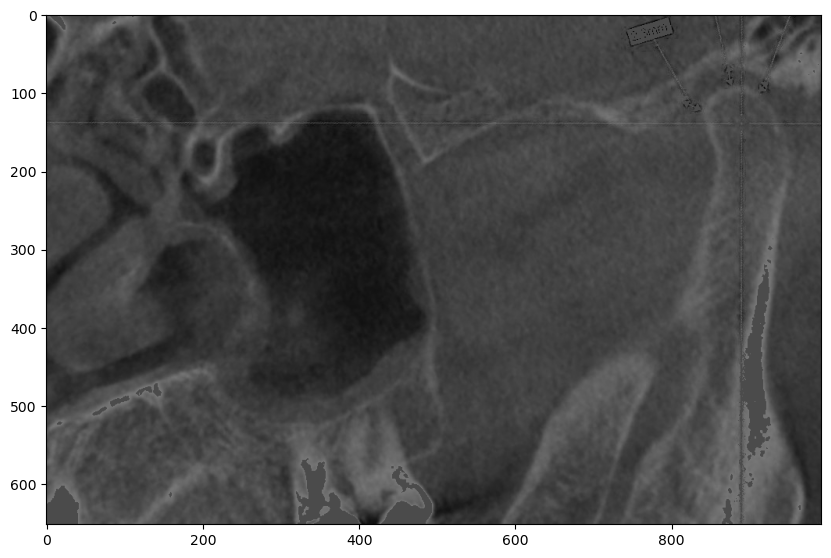

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image_bw, cmap='gray') # ПОКАЗАТЬ что там
plt.show()

#### Перевод изображения в двумерное

In [ ]:
bw_image1 = np.array(image_bw) #
bw_image2 = bw_image1[:, :, 0]
final_image1 = Image.fromarray(bw_image2)

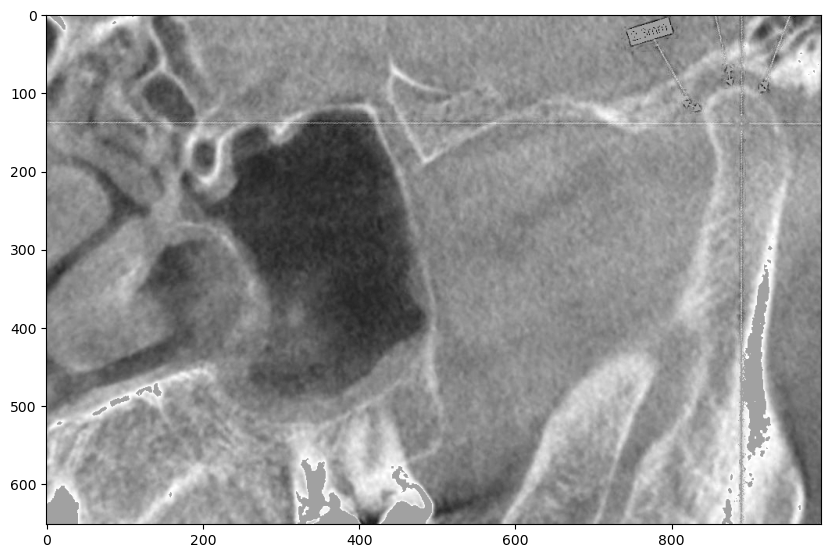

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(final_image1, cmap='gray') # ПОКАЗАТЬ что там
plt.show()

#### Разделение по пикселям

In [ ]:
final_image2 =final_image1
image_array = np.array(final_image2)
image_array[image_array <= 85] = 0
#image_array[(image_array > 0) & (image_array <= 80)] = 20
#image_array[image_array > 100] = 255
#image_array[image_array > 165] = 255
final_image3 = Image.fromarray(image_array.astype(np.uint8))

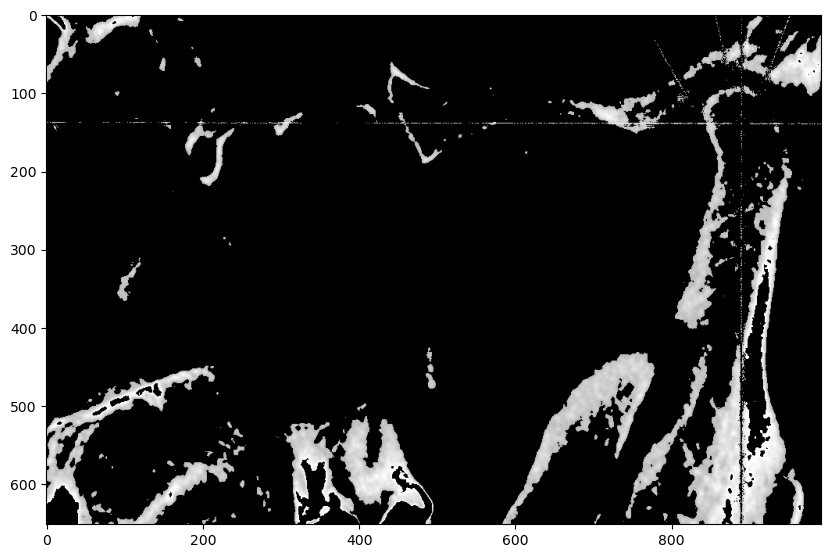

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(final_image3, cmap='gray') # ПОКАЗАТЬ что там
plt.show()

#### Повышение контрастности

In [ ]:
enhancer = ImageEnhance.Contrast(final_image3) # Создание объекта для улучшения контрастности
enhanced_image = enhancer.enhance(90.0) # Увеличение контрастности

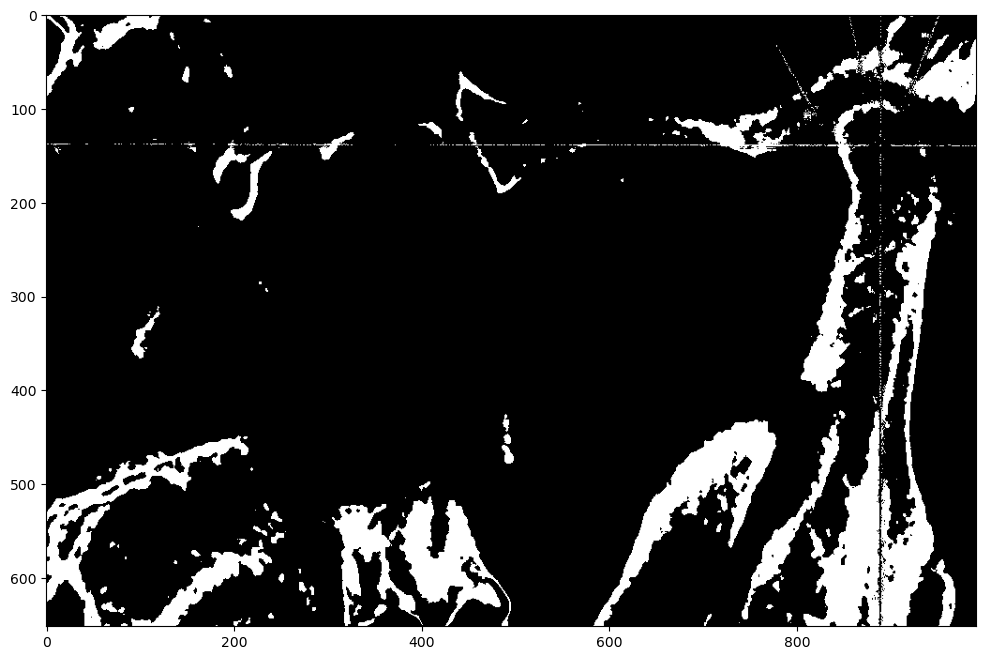

In [ ]:
plt.figure(figsize=(12, 12))
plt.imshow(enhanced_image, cmap='gray') # ПОКАЗАТЬ что там
plt.show()

# Единым скриптом

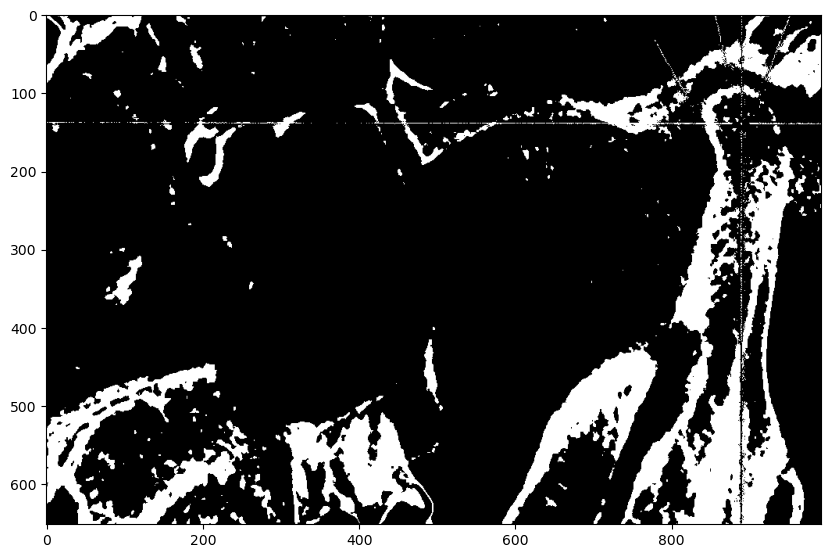

In [ ]:
image2 = Image.open('all/К101Пс.jpg') # Загрузка изображения
image_array = np.array(image2) # Преобразование изображения в массив numpy
yellow_lower = (120,120, 0) # Определение границ для желтого цвета в формате RGB
yellow_upper = (255, 255,255)
yellow_mask = np.logical_and(np.all(image_array >= yellow_lower, axis=-1), # Создание маски для желтого цвета
                                 np.all(image_array <= yellow_upper, axis=-1))
image_array[yellow_mask] = 60, 60, 60 # Замена пикселей желтого цвета на черно-белые пиксели (80, 80, 80)
final_image = Image.fromarray(image_array.astype(np.uint8))
##################################################################################

width, height = final_image.size  # Получаем ширину и высоту изображения
image_bw = Image.new('RGB', (width, height)) # Создаем новое черно-белое изображение с тремя каналами
for x in range(width):  # Обработка каждого пикселя
    for y in range(height):
        r, g, b = final_image.getpixel((x, y)) # Получаем значения каналов RGB пикселя
        if (r, g, b) != (0, 0, 0):  # Присваиваем всем цветным пикселям одинаковое значение G
            r = int(min((r,g,b)))
            g = int(min((r,g,b)))
            b = int(min((r,g,b)))
            image_bw.putpixel((x, y), (r, g, b))  # Устанавливаем новые значения каналов для черно-белого изображения
####################################################################################
bw_image1 = np.array(image_bw) #
bw_image2 = bw_image1[:, :, 0]
final_image1 = Image.fromarray(bw_image2)
####################################################################################
final_image2 =final_image1
image_array = np.array(final_image2)
image_array[image_array <= 20] = 0
image_array[(image_array > 20) & (image_array <= 80)] = 20
final_image3 = Image.fromarray(image_array.astype(np.uint8))
####################################################################################
enhancer = ImageEnhance.Contrast(final_image3) # Создание объекта для улучшения контрастности
enhanced_image3 = enhancer.enhance(30.0) # Увеличение контрастности
plt.figure(figsize=(10, 10))
plt.imshow(enhanced_image3, cmap='gray') # ПОКАЗАТЬ что там
plt.show()

In [ ]:
import importlib
from sympy import *
from sympy.plotting import plot3d
from tensorflow.keras.datasets import mnist # библиотека с базой Mnist                         +
from tensorflow.keras.models import Sequential # подключение класса создания модели Sequential +
from tensorflow.keras.layers import Dense,Activation,Dropout,BatchNormalization # основные слои +
# можно будет add.Activation()
from tensorflow.keras.optimizers import Adam # подключение оптимизатора Адам
from tensorflow.keras import utils # утилиты для to_categorical                                +
from tensorflow.keras.preprocessing import image # для отрисовки изображений
import numpy as np #                                                                           +
import pylab # модуль для построения графиков
import matplotlib.pyplot as plt #                                                              +
from google.colab import files # для загрузки своей картинки
import mpl_toolkits
from PIL import Image # отрисовка изображений
# для отрисовки изображений в ноутбуке, а не в консоль (или файл)
%matplotlib inline

In [ ]:
import matplotlib.image as mpimg
import os
from tensorflow.keras.preprocessing import image
import pandas as pd
import io

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Копируем модель в текущую директорию
!cp '/content/drive/MyDrive/stajirovka_2/model_AUTO_3.h5' 'model_AUTO_3.h5'

In [ ]:
listic =  ["0_normal", "1_sujenie", "2_raschirenie", "3_distal", "4_mesial",
          '5_sujenie,_distal', "6_sujenie,_mesial", "7_raschirenie,_distal", "8_raschirenie,_mesial"]

In [ ]:
resized_image

In [ ]:
img_array = np.array(resized_image).reshape(1,24576) # перевод в массив

In [ ]:
img_array

array([[28, 30, 30, ..., 30, 30, 30]], dtype=uint8)

In [ ]:
img_array = img_array.astype('float')
img_array =img_array/255 # диапазон значений -> от 0 до 1
img_array = img_array.reshape(1, -1) # Конвертация входных данных в numpy массив

In [ ]:
predictions = model.predict(img_array)
predictions

1/1 [==============================] - 0s 48ms/step


array([[4.5816888e-04, 1.2840134e-03, 6.8574329e-03, 9.6570754e-01,
        7.2607873e-03, 1.2731082e-04, 5.6382286e-04, 1.4933097e-02,
        2.8079166e-03]], dtype=float32)

In [ ]:
# Устанавливаем путь к рабочему столу
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
# Устанавливаем имя файла
file_name = "img_array.npy"
# Создаем полный путь к файлу
file_path = os.path.join(desktop_path, file_name)
# Сохраняем массив в формате .npy
np.save(file_path, img_array)

In [ ]:
np.save('C:/Users/iRu/Desktop/222.npy', img_array)